# SciPy를 사용한 기초적인 검정
https://datascienceschool.net/view-notebook/14bde0cc05514b2cae2088805ef9ed52/

In [47]:
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt

## 연습 문제 1
- N = 10이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야지 동전이 fair하지 않다고 이야기 할 수 있을까?

In [12]:
N = 10
theta_0 = 0.5

np.random.seed(1)

x = sp.stats.bernoulli(theta_0).rvs(N)

n = np.count_nonzero(x)

sp.stats.binom_test(n, N)


0.10937500000000003

## 연습 문제 2
- N = 100이고 유의 수준이 1%라면 앞면이 나온 횟수가 몇 번이어야지 동전이 fair하지 않다고 이야기 할 수 있을까?

In [18]:
N = 100
theta_0 = 0.5

np.random.seed(0)

x = sp.stats.bernoulli(theta_0).rvs(N)

n = np.count_nonzero(x)

sp.stats.binom_test(n, N)

0.9204107626128206

## 연습 문제 3
- N = 100이고 앞면이 나온 횟수는 40번이다. 유의 수준이 1%라면 앞면이 나온 횟수가 몇 번이어야지  θ=0.4 라고 이야기 할 수 있을까?

## 연습문제 4번
- 4-1) 만약 10번 모두 같은 면이 나왔다면 유의 확률은 얼마인가?
- 4-2) 만약 9번이 같은 면이 나왔다면 유의 확률은 얼마인가?
- 4-3) 만약 8번이 같은 면이 나오고 다른 면이 2번 나왔다면 유의 확률은 얼마인가?
- 4-4) 만약 8번이 같은 면이 나오고 다른 두 면이 각각 1번씩 나왔다면 유의 확률은 얼마인가?
- 4-5) 만약 7번이 같은 면이 나오고 다른 세 면이 각각 1번씩 나왔다면 유의 확률은 얼마인가?

In [57]:
# 4-1) 10번 모두 같은 면이 나왔을 경우 유의 확률

n10 = [10, 0, 0 ,0]
print("10번 모두 같은면: {}".format(sp.stats.chisquare(n10)))

# 4-2) 9번이 같은 면
n9 = [9, 1, 0, 0]
print("9번이 같은 면 p=value ={}".format(sp.stats.chisquare(n9)))

      
# 4-3) 8번 같은 면, 다른 면 2번
      
n8 = [8, 2, 0, 0]
print("8번이 같은 면, 다른 면 2번 p=value ={}".format(sp.stats.chisquare(n8)))


#4-4) 8번 같은 면, 다른 두면 각 1번
n8_1 = [8, 1, 1, 0]
print("8번이 같은 면, 다른 두면 각 1번 p=value ={}".format(sp.stats.chisquare(n8_1)))


#4-5) 7번 같은 면, 다른 세면 각 1번
n7 = [7, 1, 1, 1]
print("9번이 같은 면 p=value ={}".format(sp.stats.chisquare(n9)))

10번 모두 같은면: Power_divergenceResult(statistic=30.0, pvalue=1.3800570312932553e-06)
9번이 같은 면 p=value =Power_divergenceResult(statistic=22.799999999999997, pvalue=4.445073647060652e-05)
8번이 같은 면, 다른 면 2번 p=value =Power_divergenceResult(statistic=17.2, pvalue=0.0006428602522538975)
8번이 같은 면, 다른 두면 각 1번 p=value =Power_divergenceResult(statistic=16.4, pvalue=0.0009387420550450413)
9번이 같은 면 p=value =Power_divergenceResult(statistic=22.799999999999997, pvalue=4.445073647060652e-05)


## 연습 문제 5
1반과 2반 학생 들의 성적이 각각 다음과 같다고 가정하자.

- 1반 : 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점,
- 2반 : 80점, 85점, 70점, 80점, 35점, 55점, 80점

1반의 실력이 2반보다 좋다고 이야기 할 수 있는가?

* 유의수준이 매우 높으므로 귀무가설을 기각할 수 없기 때문에 1반의 실력이 2번보다 좋다고 얘기할 수 없다.
  하지만 실제 평균이 5점이나 차이가 나는 것으로 미루어 볼때, 표본이 적음으로 발생한 오차라고 판단된다.

1반 평균: 74.16666666666667
2반 평균: 69.28571428571429


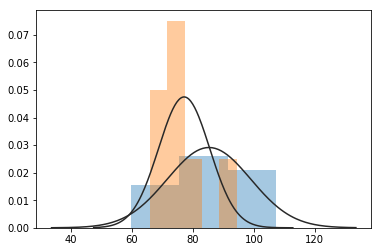

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

In [60]:
class_1 = np.array([80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80])
class_2 = np.array([80, 85, 70, 80, 35, 55, 80])

mu_1 = np.mean(class_1) ; N_1 = 12 ; sigma_1 = np.std(class_1)
mu_2 = np.mean(class_2) ; N_2 = 7 ; sigma_2 = np.std(class_2)

print('1반 평균: {}'.format(mu_1))
print('2반 평균: {}'.format(mu_2))

## random 
np.random.seed(0)

x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)

sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)

plt.show()
## random

sp.stats.ttest_ind(class_1, class_2, equal_var=False)


## 연습 문제 6
어느 학급의 9월달 성적과 10월달 성적이 다음과 같다. 점수는 학생 번호 순으로 배열되어 있다.

- 9월 : 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점
- 10월: 90점, 70점, 90점, 65점, 80점, 85점, 65점, 75점, 80점, 90점, 95점, 95점

이 학급의 실력은 더 향상되었다고 이야기 할 수 있는가?

* 유의수준이 1%라고 했을 때, 귀무가설을 기각할 수 있으므로 학급의 실력이 향상되었다고 할 수 있다.


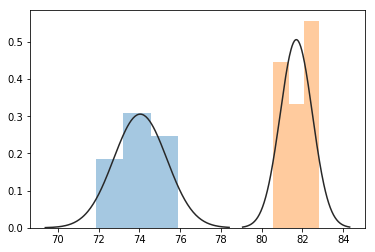

9월의 평균: 74.16666666666667
10월의 평균: 81.66666666666667


Ttest_relResult(statistic=-2.6281127723493993, pvalue=0.023486192540203194)

In [63]:
month_9 = np.array([80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80])
month_10 = np.array([90, 70, 90, 65, 80, 85, 65, 75, 80, 90, 95, 95])

#random
N = 12
mu_9 = np.mean(month_9) ; sigma_9 = np.std(month_9)
mu_10 = np.mean(month_10) ; sigma_10 = np.std(month_10)

np.random.seed(1)

x1 = sp.stats.norm(mu_9).rvs(N)
x2 = sp.stats.norm(mu_10).rvs(N)

sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)

plt.show()
#random

print('9월의 평균: {}'.format(mu_9))
print('10월의 평균: {}'.format(mu_10))

sp.stats.ttest_rel(month_9, month_10)